In [1]:
import os
from glob import glob
import numpy as np
import dask
import xarray as xr

from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *

In [2]:
from dask_jobqueue import PBSCluster
local_dir = os.getenv('TMPDIR')
cluster = PBSCluster(local_directory=local_dir)
#print(cluster.job_script())
w = cluster.start_workers(10)

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/distributed/utils.py:128: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  % (host, default, e), RuntimeWarning)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/docrep/__init__.py:342: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  s = dedents('\n' + '\n'.join(lines[first:]))


In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

Client Scheduler: tcp://10.148.0.21:59520 Dashboard: http://10.148.0.21:8787/status,Cluster Workers: 20 Cores: 80 Memory: 1000.00 GB


# 1. Read Pi results

In [5]:
out_dir_zarr = '/home1/scratch/xyu/OSMOSIS_llc4320/zarr_file/'

Pi_h = xr.open_zarr(out_dir_zarr+'Pi_horizontal_rechunk.zarr')
Pi_w = xr.open_zarr(out_dir_zarr+'Pi_vertical_rechunk.zarr')

ds = xr.merge([Pi_h,Pi_w])
print(ds)

<xarray.Dataset>
Dimensions:  (depth: 52, lat: 201, lon: 177, time: 9415)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 5.78 7.595 9.66 12.01 14.68 ...
  * lat      (lat) float64 47.4 47.42 47.43 47.44 47.46 47.47 47.48 47.5 ...
  * lon      (lon) float64 -18.03 -18.01 -17.99 -17.97 -17.95 -17.93 -17.91 ...
  * time     (time) float64 0.0 0.04167 0.08333 0.125 0.1667 0.2083 0.25 ...
Data variables:
    Pi_h     (time, depth, lat, lon) float32 dask.array<shape=(9415, 52, 201, 177), chunksize=(9415, 1, 201, 177)>
    Pi_w     (time, depth, lat, lon) float32 dask.array<shape=(9415, 52, 201, 177), chunksize=(9415, 1, 201, 177)>


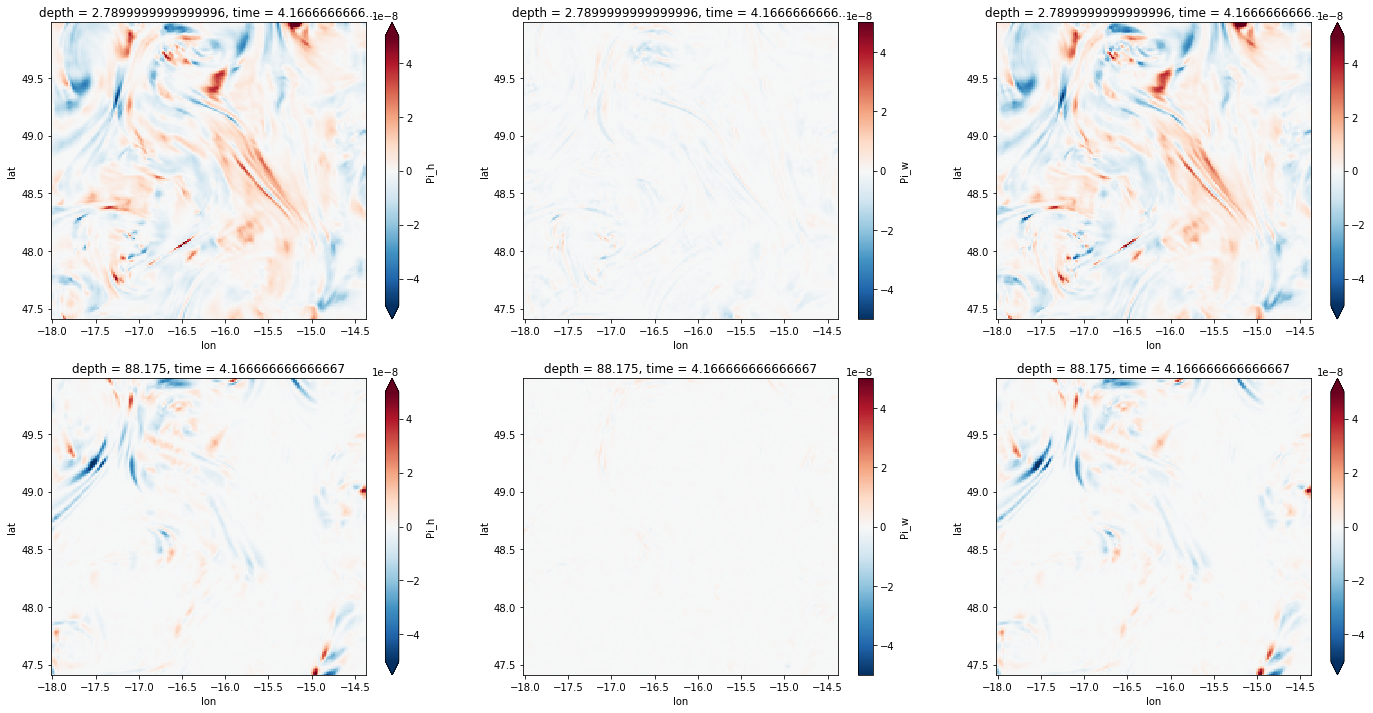

In [7]:
fig = plt.figure(figsize = (24,12))

plt.subplot(231)
ds.Pi_h.isel(lat=slice(1,-1),lon=slice(1,-1),depth=2,time=100).plot(x='lon', y='lat', vmin=-5e-8, vmax=5e-8, cmap='RdBu_r')
plt.subplot(232)
ds.Pi_w.isel(lat=slice(1,-1),lon=slice(1,-1),depth=2,time=100).plot(x='lon', y='lat', vmin=-5e-8, vmax=5e-8,cmap='RdBu_r')
plt.subplot(233)
(ds.Pi_h+ds.Pi_w).isel(lat=slice(1,-1),lon=slice(1,-1),depth=2,time=100).plot(x='lon', y='lat', vmin=-5e-8, vmax=5e-8,cmap='RdBu_r')

plt.subplot(234)
ds.Pi_h.isel(lat=slice(1,-1),lon=slice(1,-1),depth=20,time=100).plot(x='lon', y='lat', vmin=-5e-8, vmax=5e-8, cmap='RdBu_r')
plt.subplot(235)
ds.Pi_w.isel(lat=slice(1,-1),lon=slice(1,-1),depth=20,time=100).plot(x='lon', y='lat', vmin=-5e-8, vmax=5e-8,cmap='RdBu_r')
plt.subplot(236)
(ds.Pi_h+ds.Pi_w).isel(lat=slice(1,-1),lon=slice(1,-1),depth=20,time=100).plot(x='lon', y='lat', vmin=-5e-8, vmax=5e-8,cmap='RdBu_r')

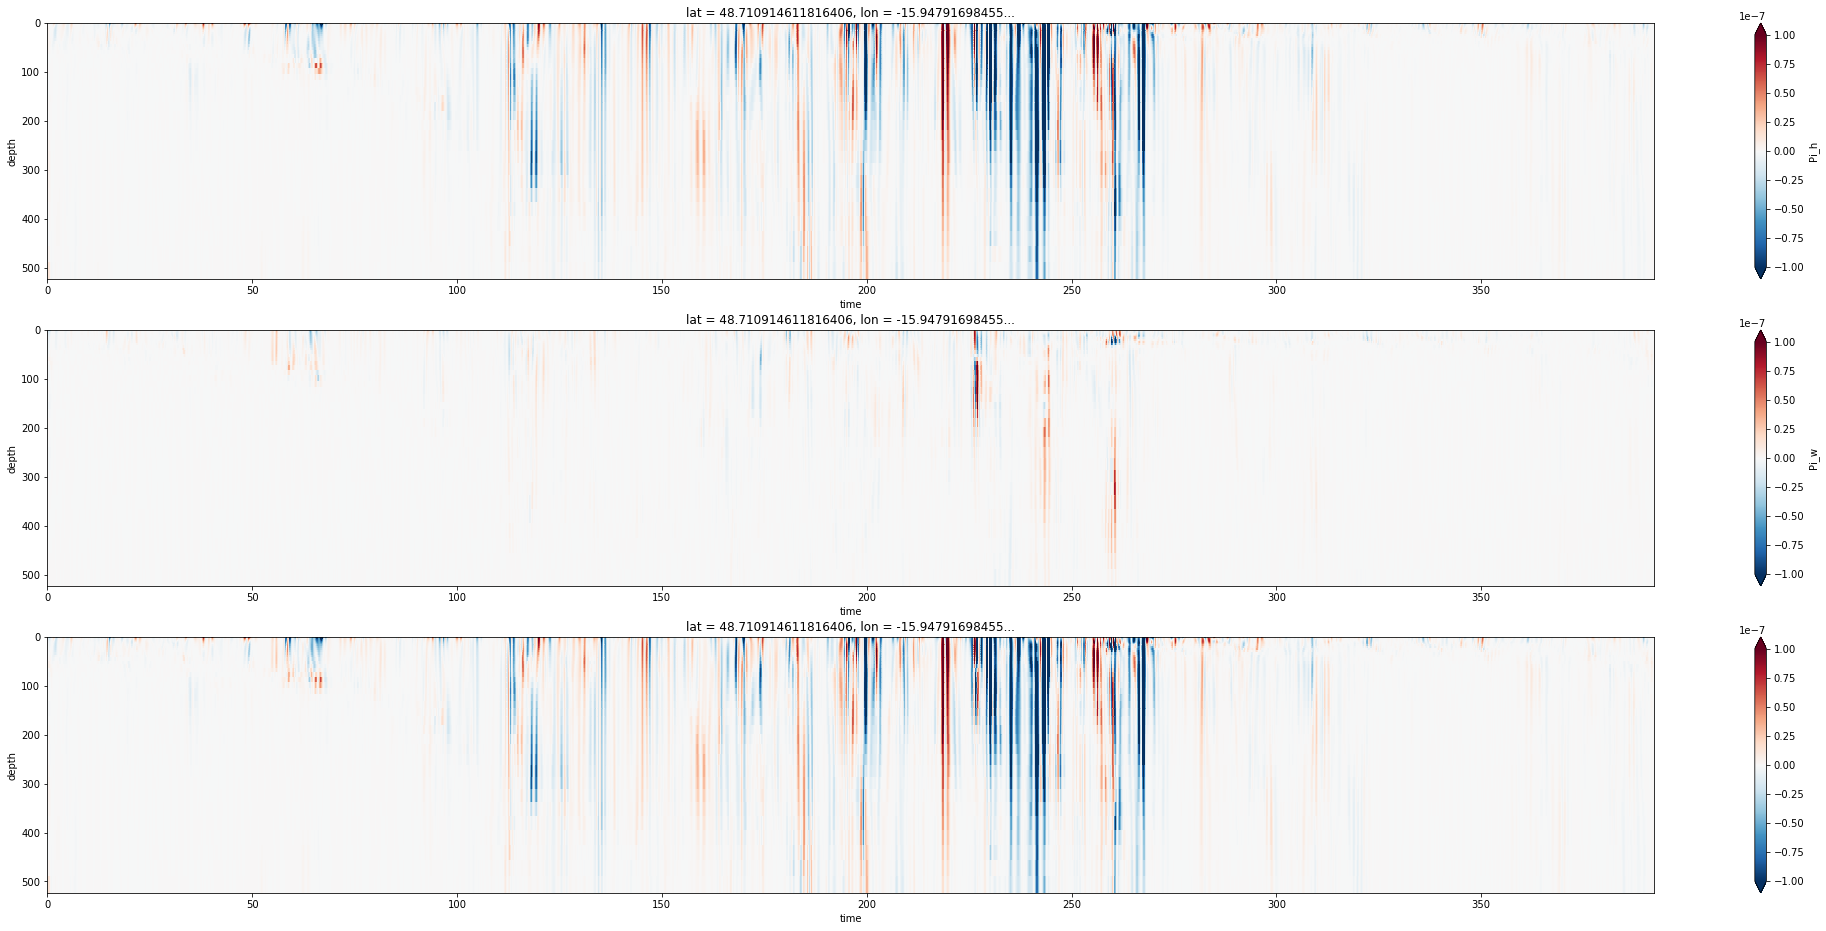

In [8]:
fig = plt.figure(figsize=(36,16))

plt.subplot(311)
ds.Pi_h.isel(depth=slice(0,40),lat=100,lon=100).plot(x='time', y='depth',cmap='RdBu_r', vmin=-1e-7,vmax=1e-7,yincrease=False)
plt.subplot(312)
ds.Pi_w.isel(depth=slice(0,40),lat=100,lon=100).plot(x='time', y='depth',cmap='RdBu_r', vmin=-1e-7,vmax=1e-7,yincrease=False)
plt.subplot(313)
(ds.Pi_h+ds.Pi_w).isel(depth=slice(0,40),lat=100,lon=100).plot(x='time', y='depth',cmap='RdBu_r', vmin=-1e-7,vmax=1e-7,yincrease=False)

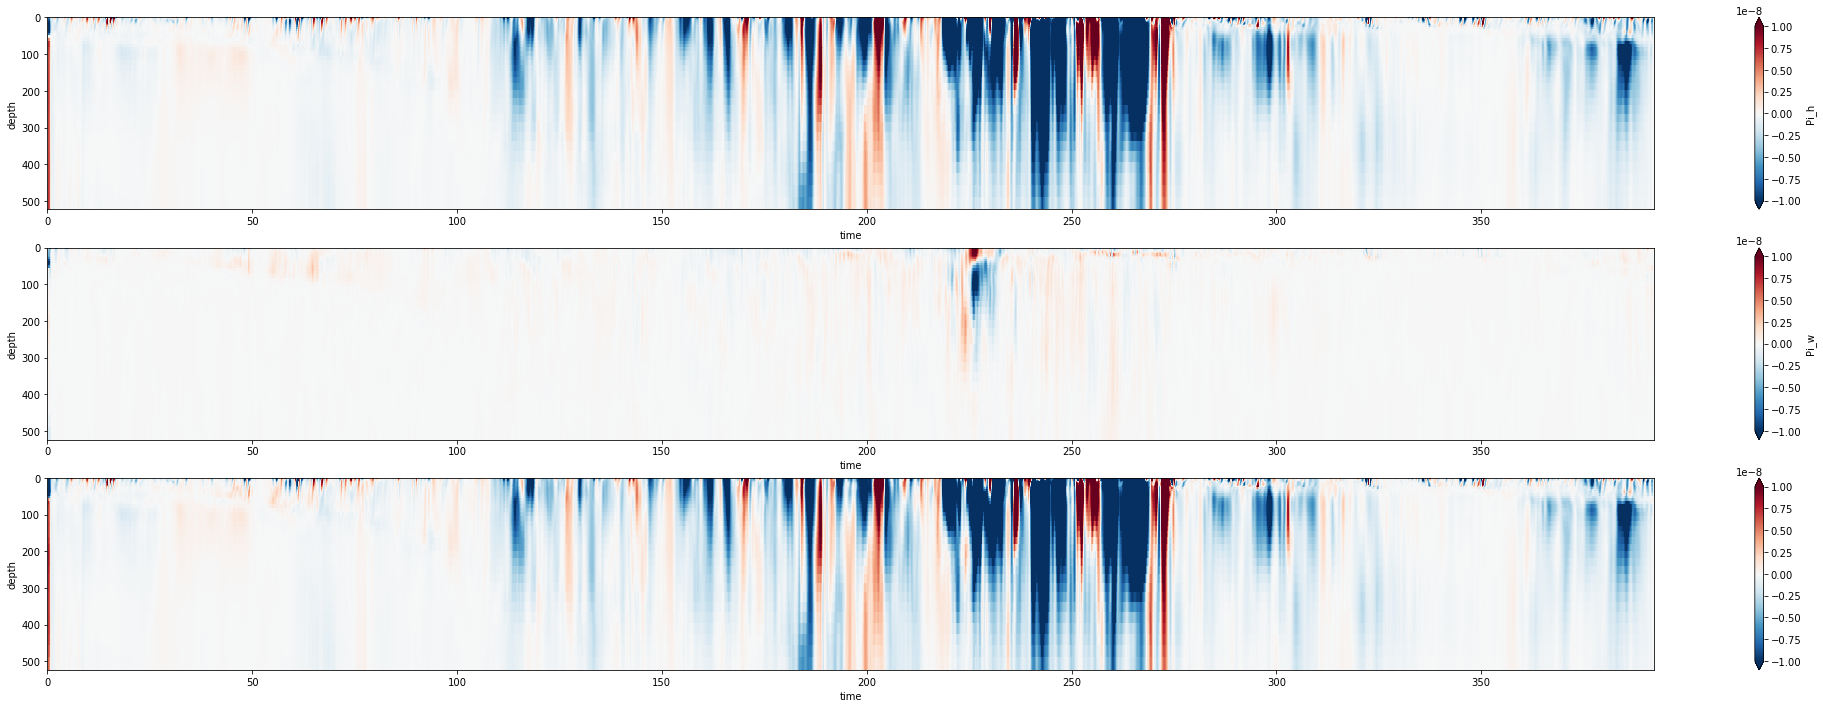

In [9]:
fig = plt.figure(figsize=(36,12))

plt.subplot(311)
ds.Pi_h.isel(depth=slice(0,40),lat=slice(80,120),lon=slice(70,110)).mean(['lat','lon']).plot(x='time', y='depth',cmap='RdBu_r', vmin=-1e-8,vmax=1e-8,yincrease=False)
plt.subplot(312)
ds.Pi_w.isel(depth=slice(0,40),lat=slice(80,120),lon=slice(70,110)).mean(['lat','lon']).plot(x='time', y='depth',cmap='RdBu_r', vmin=-1e-8,vmax=1e-8,yincrease=False)
plt.subplot(313)
(ds.Pi_h+ds.Pi_w).isel(depth=slice(0,40),lat=slice(80,120),lon=slice(70,110)).mean(['lat','lon']).plot(x='time', y='depth',cmap='RdBu_r', vmin=-1e-8,vmax=1e-8,yincrease=False)

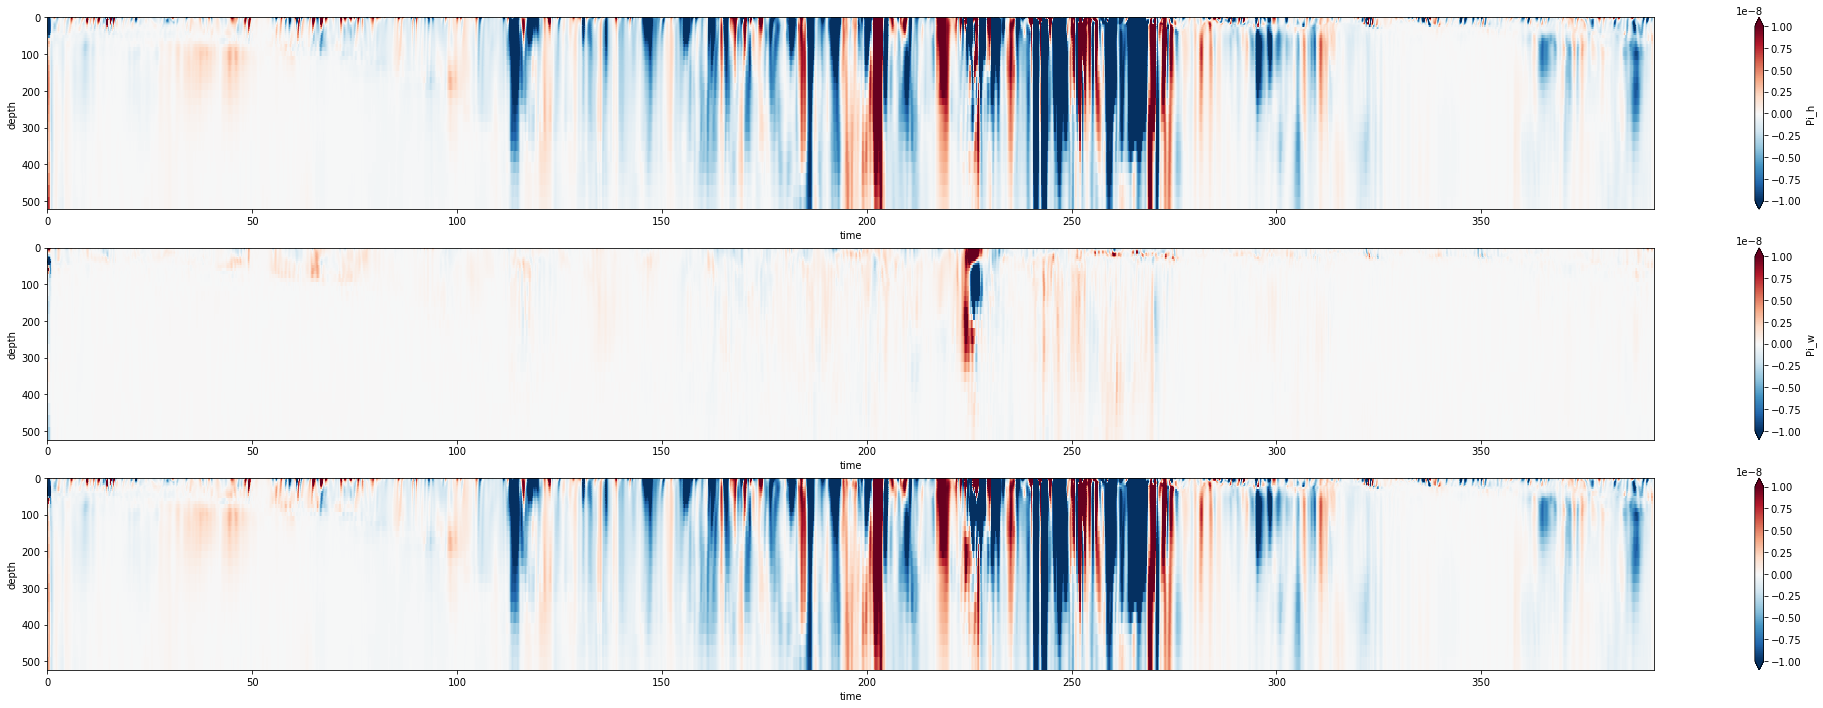

In [10]:
fig = plt.figure(figsize=(36,12))

plt.subplot(311)
ds.Pi_h.isel(depth=slice(0,40),lat=slice(90,110),lon=slice(80,100)).mean(['lat','lon']).plot(x='time', y='depth',cmap='RdBu_r', vmin=-1e-8,vmax=1e-8,yincrease=False)
plt.subplot(312)
ds.Pi_w.isel(depth=slice(0,40),lat=slice(90,110),lon=slice(80,100)).mean(['lat','lon']).plot(x='time', y='depth',cmap='RdBu_r', vmin=-1e-8,vmax=1e-8,yincrease=False)
plt.subplot(313)
(ds.Pi_h+ds.Pi_w).isel(depth=slice(0,40),lat=slice(90,110),lon=slice(80,100)).mean(['lat','lon']).plot(x='time', y='depth',cmap='RdBu_r', vmin=-1e-8,vmax=1e-8,yincrease=False)

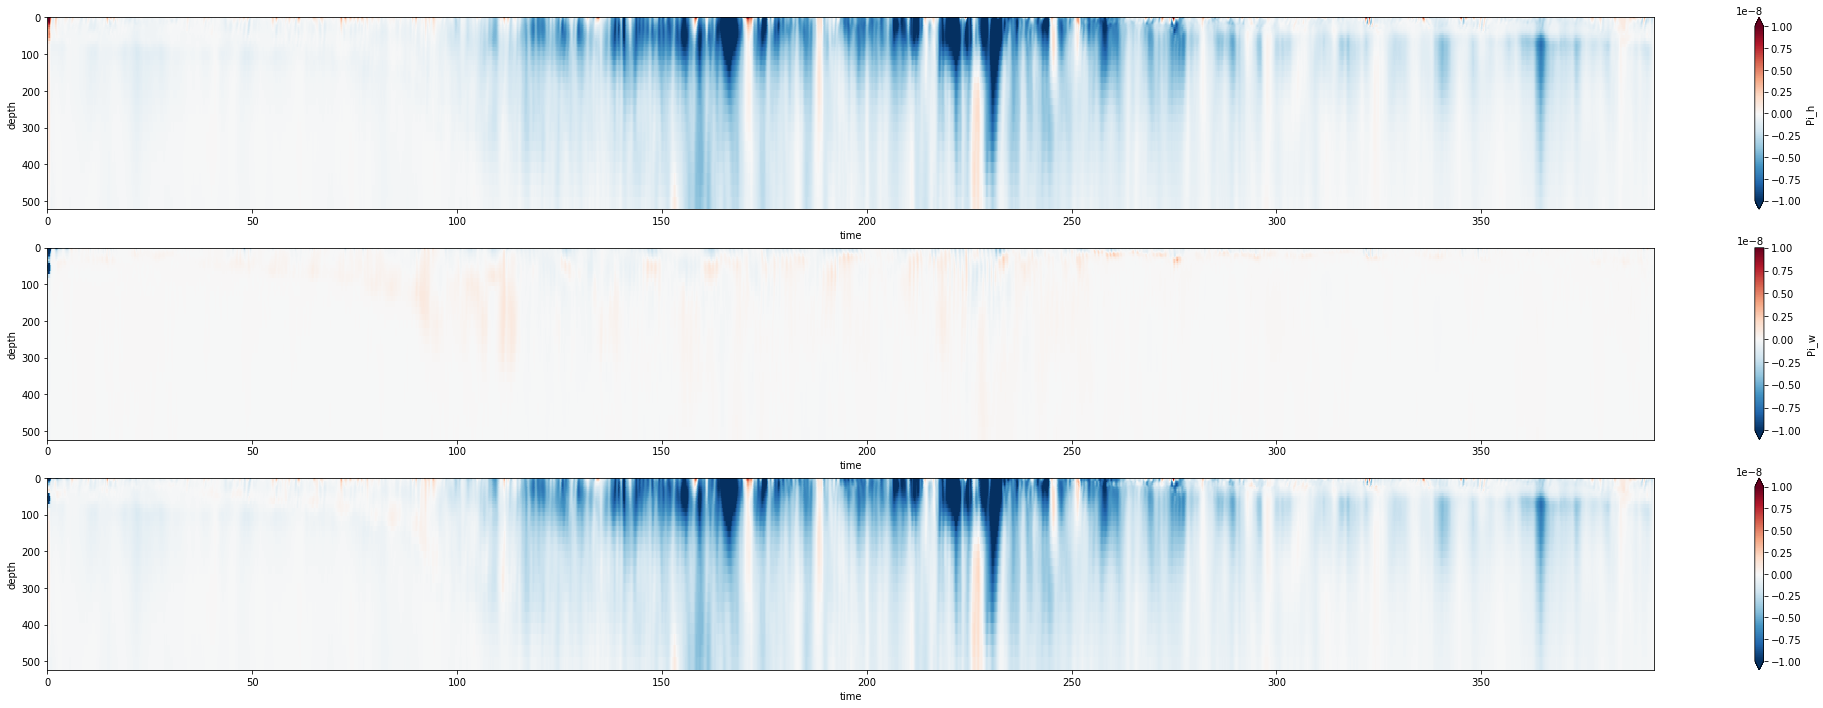

In [11]:
fig = plt.figure(figsize=(36,12))

plt.subplot(311)
ds.Pi_h.isel(depth=slice(0,40),lat=slice(1,-1),lon=slice(1,-1)).mean(['lat','lon']).plot(x='time', y='depth',cmap='RdBu_r', vmin=-1e-8,vmax=1e-8,yincrease=False)
plt.subplot(312)
ds.Pi_w.isel(depth=slice(0,40),lat=slice(1,-1),lon=slice(1,-1)).mean(['lat','lon']).plot(x='time', y='depth',cmap='RdBu_r', vmin=-1e-8,vmax=1e-8,yincrease=False)
plt.subplot(313)
(ds.Pi_h+ds.Pi_w).isel(depth=slice(0,40),lat=slice(1,-1),lon=slice(1,-1)).mean(['lat','lon']).plot(x='time', y='depth',cmap='RdBu_r', vmin=-1e-8,vmax=1e-8,yincrease=False)

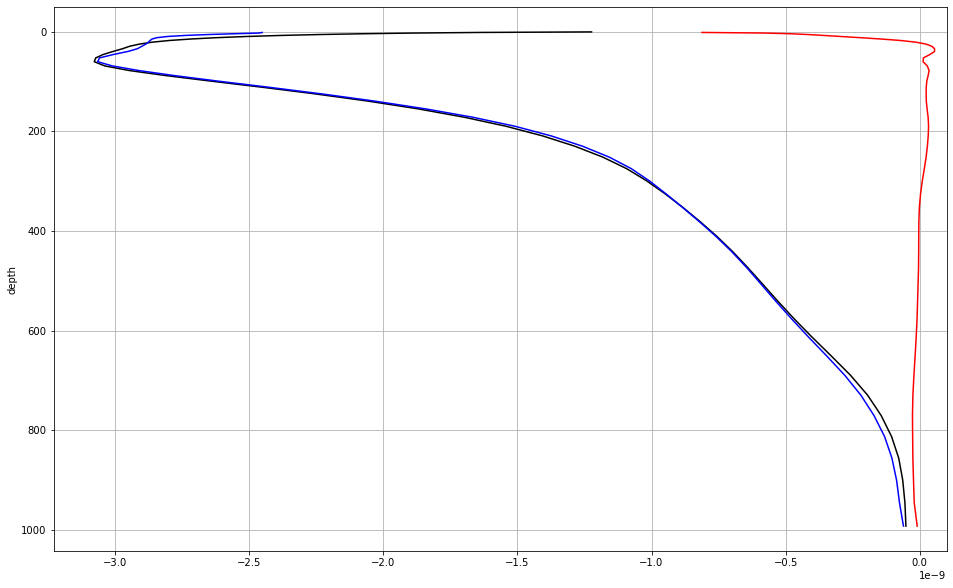

In [11]:
fig, ax = plt.subplots(figsize=(16,10))

ds.Pi_h.isel(lat=slice(1,-1),lon=slice(1,-1)).mean(['time','lat','lon']).plot(y='depth', yincrease=False,color='black')
ds.Pi_w.isel(lat=slice(1,-1),lon=slice(1,-1)).mean(['time','lat','lon']).plot(y='depth', yincrease=False,color='red')
(ds.Pi_h+ds.Pi_w).isel(lat=slice(1,-1),lon=slice(1,-1)).mean(['time','lat','lon']).plot(y='depth', yincrease=False,color='blue')
ax.grid()

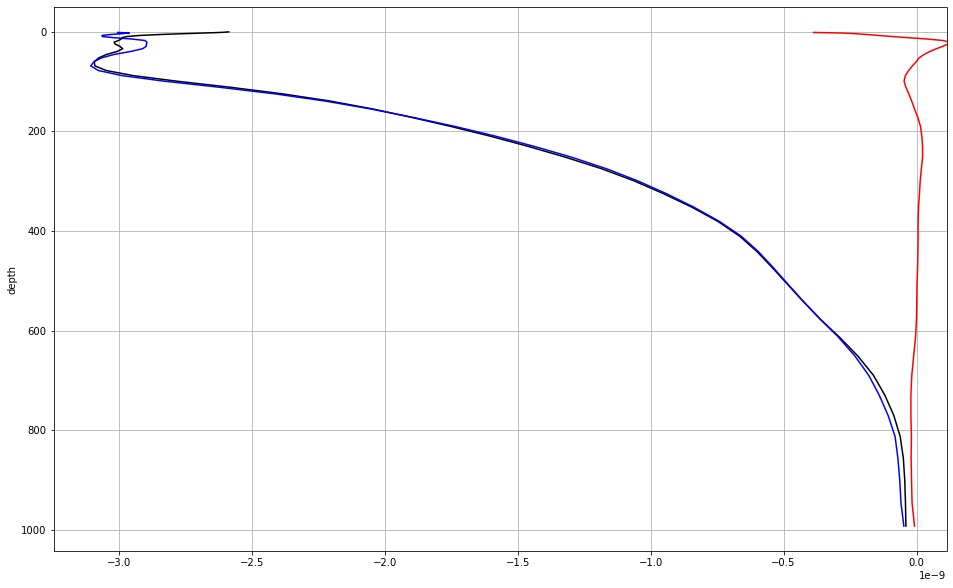

In [12]:
fig, ax = plt.subplots(figsize=(16,10))

ds.Pi_h.isel(lat=slice(80,120),lon=slice(70,110)).mean(['time','lat','lon']).plot(y='depth', yincrease=False,color='black')
ds.Pi_w.isel(lat=slice(80,120),lon=slice(70,110)).mean(['time','lat','lon']).plot(y='depth', yincrease=False,color='red')
(ds.Pi_h+ds.Pi_w).isel(lat=slice(80,120),lon=slice(70,110)).mean(['time','lat','lon']).plot(y='depth', yincrease=False,color='blue')
ax.grid()

In [14]:
cluster.scheduler.close()

<Future finished result=None>